# Práctica 3
Propósito: Comprender y aplicar una red neuronal convolucional para el reconocimiento de imágenes utilizando el conjunto de datos MNIST.

## Dataset MNIST y visualización de algunas imágenes

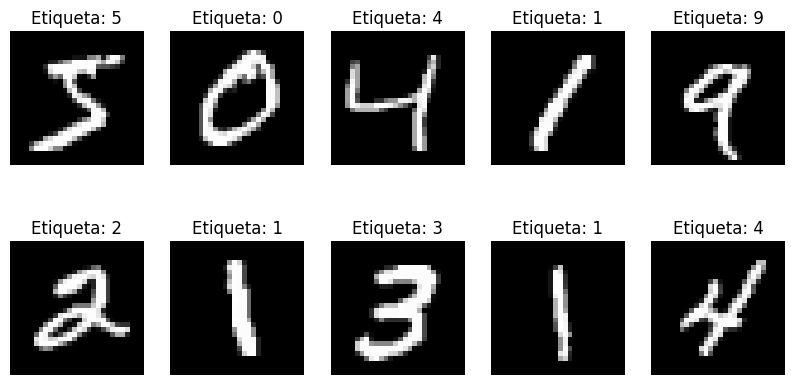

In [9]:
# Importar las librerías
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Input

# Cargar el dataset MNIST
(X_train , y_train), (X_test, y_test) = mnist.load_data ()

# Gráfico para visualizar las 10 primeras imágenes
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Etiqueta: {y_train[i]}')
    plt.axis('off')
plt.show()

## Implementación del modelo CNN según el ejemplo

In [10]:
# Preprocesamiento
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Definir modelo
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 323s 62ms/step - accuracy: 0.8928 - loss: 0.3632 - val_accuracy: 0.9860 - val_loss: 0.0569
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 88s 41ms/step - accuracy: 0.9810 - loss: 0.0620 - val_accuracy: 0.9835 - val_loss: 0.0552
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 88s 45ms/step - accuracy: 0.9887 - loss: 0.0365 - val_accuracy: 0.9848 - val_loss: 0.0538
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.9913 - loss: 0.0257 - val_accuracy: 0.9890 - val_loss: 0.0427
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 76s 40ms/step - accuracy: 0.9949 - loss: 0.0180 - val_accuracy: 0.9857 - val_loss: 0.0524


## Evaluación del rendimiento en el conjunto de prueba

### Exactitud (Accuracy)

In [43]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Rendimiento del modelo:')
print(f'Pérdida: {test_loss:.4f}')
print(f'Accuracy: {test_accuracy:.4f}')

Rendimiento del modelo:
Pérdida: 0.0445
Accuracy: 0.9852


**El modelo alcanzó una exactitud (Accuracy) del 98.52% y la pérdida de 0.0445 indica un buen ajuste.**

### Matriz de confusión y conclusiones

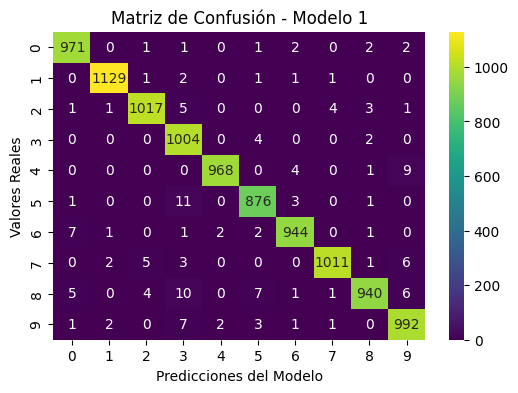


Evaluación por dígito:
              precision    recall  f1-score   support

           0     0.9848    0.9908    0.9878       980
           1     0.9947    0.9947    0.9947      1135
           2     0.9893    0.9855    0.9874      1032
           3     0.9617    0.9941    0.9776      1010
           4     0.9959    0.9857    0.9908       982
           5     0.9799    0.9821    0.9810       892
           6     0.9874    0.9854    0.9864       958
           7     0.9931    0.9835    0.9883      1028
           8     0.9884    0.9651    0.9766       974
           9     0.9764    0.9832    0.9798      1009

    accuracy                         0.9852     10000
   macro avg     0.9852    0.9850    0.9850     10000
weighted avg     0.9853    0.9852    0.9852     10000



In [45]:
# Obtener predicciones
y_pred = model.predict(X_test, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Matriz de confusión
matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,4))
sns.heatmap(matrix, annot=True, fmt='d', cmap='viridis')
plt.title('Matriz de Confusión - Modelo 1')
plt.xlabel('Predicciones del Modelo')
plt.ylabel('Valores Reales')
plt.show()

print(f'\nEvaluación por dígito:')
print(classification_report(y_true, y_pred_classes, digits=4))

Dado que en la diagonal se encuentran los valores más grandes, confirmamos con la matriz que el modelo es bastante exacto.

Sobre algunos dígitos:
- Dígito 1: el dígito con mayor precisión es el 1 y alto recall (sensibilidad), quiere decir que el modelo detecta bastante bien esta clase.
- Dígito 3: la precisión del 3 es la más baja dado que algunos 5 y 8 se clasifican incorrectamente como 3, sin embargo posee un alto recall, debido a lo anterior decimos que el modelo detecta bien la clase, pero también incluye muestra de las otras.
- Dígito 8: Clase con el recall más bajo, 10 números son clasificados como 3, 7 como número 5 y 6 como número 9.

Por lo tanto observando los valores para cada clase, concluimos que el modelo tiene dificultades con la detección de dígitos con formas similares (como el 5 y el 8), esto podría reducirse añadiendo una capa convolucional para una mejor detección de bordes y curvas y también agregar más neuronas para clasificación.

## Modificación del número de capas y neuronas

In [38]:
# Modelo con más capas y neuronas
model_modified = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_modified.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model_modified.fit(X_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 233s 67ms/step - accuracy: 0.8951 - loss: 0.3362 - val_accuracy: 0.9828 - val_loss: 0.0582
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 98s 48ms/step - accuracy: 0.9848 - loss: 0.0480 - val_accuracy: 0.9883 - val_loss: 0.0375
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.9903 - loss: 0.0315 - val_accuracy: 0.9895 - val_loss: 0.0356
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 92s 54ms/step - accuracy: 0.9925 - loss: 0.0242 - val_accuracy: 0.9897 - val_loss: 0.0327
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 118s 70ms/step - accuracy: 0.9945 - loss: 0.0174 - val_accuracy: 0.9893 - val_loss: 0.0377


_Cambios:_
-  Capa convolucional - Conv2D(64, (3,3)): para detectar patrones más complejos
- MaxPooling2D((2,2)) : reduce la dimensionalidad
- Más neuronas - Dense(128, activation='relu'): para mejorar la clasificación


## Evaluación del rendimiento en el conjunto de prueba

### Exactitud (Accuracy)

In [46]:
test_loss, test_accuracy = model_modified.evaluate(X_test, y_test, verbose=0)
print(f'Rendimiento del modelo:')
print(f'Pérdida: {test_loss:.4f}')
print(f'Accuracy: {test_accuracy:.4f}')

Rendimiento del modelo:
Pérdida: 0.0296
Accuracy: 0.9907


**El modelo alcanzó una exactitud (Accuracy) del 99.07% (vs 98.52% anterior) y la pérdida es 0.0296 (vs 0.0445 en modelo anterior)**

### Matriz de confusión y conclusiones sobre este modelo

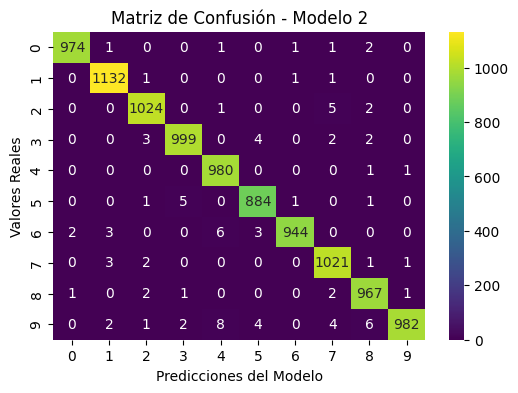


Evaluación por dígito:
              precision    recall  f1-score   support

           0     0.9969    0.9939    0.9954       980
           1     0.9921    0.9974    0.9947      1135
           2     0.9903    0.9922    0.9913      1032
           3     0.9921    0.9891    0.9906      1010
           4     0.9839    0.9980    0.9909       982
           5     0.9877    0.9910    0.9894       892
           6     0.9968    0.9854    0.9911       958
           7     0.9855    0.9932    0.9893      1028
           8     0.9847    0.9928    0.9888       974
           9     0.9970    0.9732    0.9850      1009

    accuracy                         0.9907     10000
   macro avg     0.9907    0.9906    0.9906     10000
weighted avg     0.9907    0.9907    0.9907     10000



In [48]:
# Obtener predicciones
y_pred = model_modified.predict(X_test, verbose=0) 
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Matriz de confusión
matrix_model_modified = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,4))
sns.heatmap(matrix_model_modified, annot=True, fmt='d', cmap='viridis')
plt.title('Matriz de Confusión - Modelo 2')
plt.xlabel('Predicciones del Modelo')
plt.ylabel('Valores Reales')
plt.show()

print(f'\nEvaluación por dígito:')
print(classification_report(y_true, y_pred_classes, digits=4))

En general hubo mejoras, se redujeron las confusiones con el 3, 5 y 8. Todas las clases superan ahora el 98% en F1-Score y la varianza entre métricas por clase se redujo.

## Conclusiones finales

El segundo modelo logra mayor precisión y menor pérdida, debido a la capacidad de detectar más características con capas y neuronas adicionales. Sin embargo, debido a que el modelo es un poco más complejo, podría sobreajustarse. En cuanto al entrenamiento y uso de memoria, el primer modelo es más rápido y hace menos uso de memoria, debido a que es un modelo más sencillo.

En un cambio ligero del rendimiento, la mejora puede no justificar las capas y neuronas agregadas, así como el costo computacional añadido. Si se tratará de un problema más complejo, como la detección de animales en imágenes, sería necesario hacer el modelo más profundo. En este caso, hubo una mejora de un modelo a otro, pero el primer modelo ya logra buenos resultados.

Una CNN es una herramienta poderosa para la clasificación de imágenes y podría emplearse en distintos sectores.